<a href="https://colab.research.google.com/github/Milind305/Neural_Network_Classification/blob/main/Assignment_Neural_Network_Forestfires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries
import tensorflow as tf

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

import keras
from keras.models import Sequential
from keras.layers import  Dense, Dropout,Activation, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam, SGD, Adagrad, Adadelta, Adamax


In [11]:
# loading dataset
Forestfires= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ExcelR (1)/Assignments/Neural net/forestfires.csv')

In [12]:
# copy the data 
df= Forestfires.copy()

In [13]:
# Exploring the data
# Head of the data
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [14]:
df1= df.drop(labels=['month', 'day'], axis=1)
df1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [16]:
# Checking for null values and datatype of features
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [20]:
features= df1.columns
print(features)

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')


In [21]:
# Since features after area are one hot encoded, we will try to explore the features before that column
features1= features[0:9]
print(features1)

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area'], dtype='object')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ac1577090>,
      dtype=object)

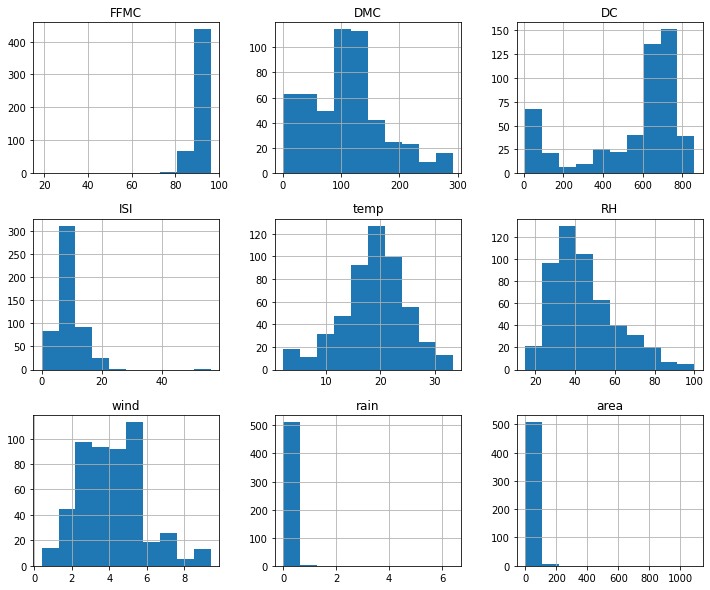

In [63]:
# Distribution of continous features
df1[features1].hist(figsize=(12,10))

In [46]:
for feature in features1:
  unique_values_count= len(df1[feature].unique())
  unique_values= df1[feature].unique()
  print('The {} has {} unique values as {}....'.format(feature, unique_values_count, unique_values[0:5]))

The FFMC has 106 unique values as [86.2 90.6 91.7 89.3 92.3]....
The DMC has 215 unique values as [26.2 35.4 43.7 33.3 51.3]....
The DC has 219 unique values as [ 94.3 669.1 686.9  77.5 102.2]....
The ISI has 119 unique values as [ 5.1  6.7  9.   9.6 14.7]....
The temp has 192 unique values as [ 8.2 18.  14.6  8.3 11.4]....
The RH has 75 unique values as [51 33 97 99 29]....
The wind has 21 unique values as [6.7 0.9 1.3 4.  1.8]....
The rain has 7 unique values as [0.  0.2 1.  6.4 0.8]....
The area has 251 unique values as [0.   0.36 0.43 0.47 0.55]....


From above data, it is clear that the features having the dimensionality issue. Hence we will transform the data

In [49]:
# Scaling the features
scaler= MinMaxScaler()
df2= pd.DataFrame(scaler.fit_transform(df1[features1]))
df2.head()

,0,1,2,3,4,5,6,7,8
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0


In [54]:
df3= df1.iloc[:, 9:]
df3.head()

,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [57]:
final_df= pd.concat([df2,df3], axis=1 )
final_df.head()

,0,1,2,3,4,5,6,7,8,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [67]:
# converting the target feature into numerical one hot coded feature
final_df['size_category']= pd.get_dummies(final_df['size_category'],drop_first=True)

In [69]:
# Final Dataframe
final_df.head()

,0,1,2,3,4,5,6,7,8,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [71]:
final_df.describe()

,0,1,2,3,4,5,6,7,8,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,0.928318,0.378264,0.633329,0.160814,0.536629,0.344567,0.401956,0.003385,0.011777,0.164410,0.143133,0.162476,0.183752,0.117988,0.123791,0.104449,0.017408,0.355899,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689,0.731141
std,0.071227,0.220698,0.290918,0.081274,0.186708,0.191970,0.199073,0.046244,0.058355,0.371006,0.350548,0.369244,0.387657,0.322907,0.329662,0.306138,0.130913,0.479249,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632,0.443796
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.922581,0.232598,0.504046,0.115865,0.427653,0.211765,0.255556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.940645,0.369400,0.769673,0.149733,0.549839,0.317647,0.400000,0.000000,0.000477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.957419,0.486906,0.827958,0.192513,0.662379,0.447059,0.500000,0.000000,0.006023,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
# Correlation matrix
c= df1[features1].corr()
print(c)

          FFMC       DMC        DC  ...      wind      rain      area
FFMC  1.000000  0.382619  0.330512  ... -0.028485  0.056702  0.040122
DMC   0.382619  1.000000  0.682192  ... -0.105342  0.074790  0.072994
DC    0.330512  0.682192  1.000000  ... -0.203466  0.035861  0.049383
ISI   0.531805  0.305128  0.229154  ...  0.106826  0.067668  0.008258
temp  0.431532  0.469594  0.496208  ... -0.227116  0.069491  0.097844
RH   -0.300995  0.073795 -0.039192  ...  0.069410  0.099751 -0.075519
wind -0.028485 -0.105342 -0.203466  ...  1.000000  0.061119  0.012317
rain  0.056702  0.074790  0.035861  ...  0.061119  1.000000 -0.007366
area  0.040122  0.072994  0.049383  ...  0.012317 -0.007366  1.000000

[9 rows x 9 columns]


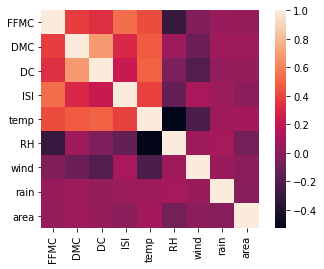

In [77]:
sns.heatmap(c, vmax=1, square=True)

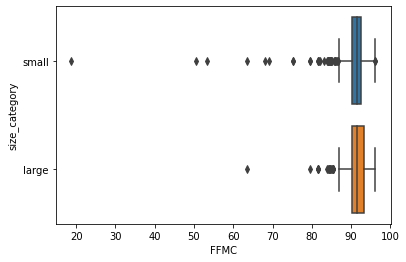

In [78]:
sns.boxplot(data= df1, x= 'FFMC', y= 'size_category')

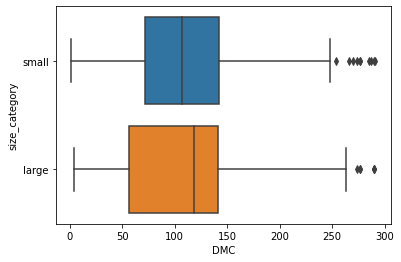

In [79]:
sns.boxplot(data= df1, x= 'DMC', y= 'size_category')

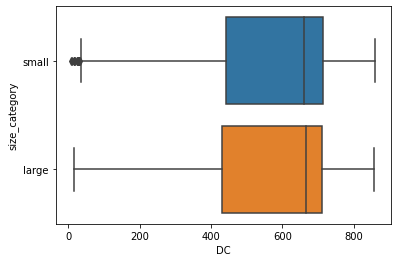

In [80]:
sns.boxplot(data= df1, x= 'DC', y= 'size_category')

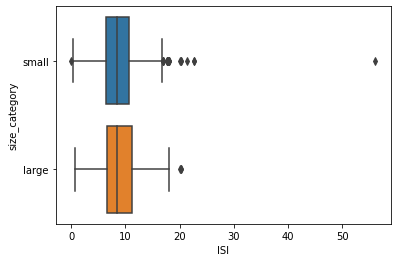

In [81]:
sns.boxplot(data= df1, x= 'ISI', y= 'size_category')

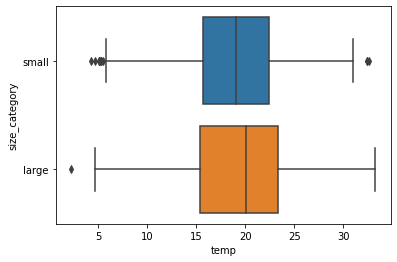

In [83]:
sns.boxplot(data= df1, x= 'temp', y= 'size_category')

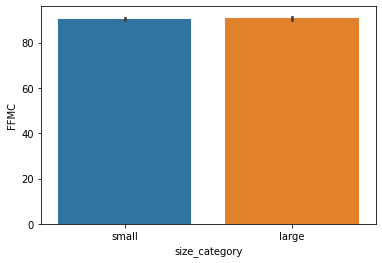

In [87]:
  sns.barplot(data=df1, x='size_category', y='FFMC')

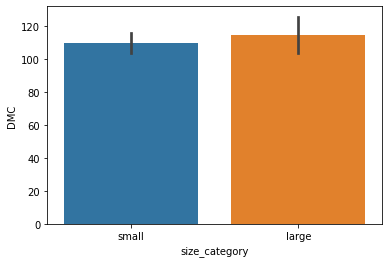

In [88]:
  sns.barplot(data=df1, x='size_category', y='DMC')

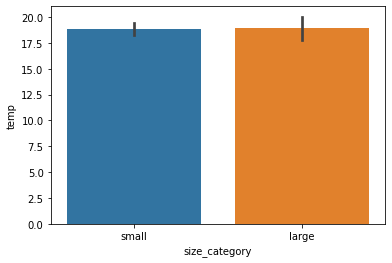

In [89]:
  sns.barplot(data=df1, x='size_category', y='temp')

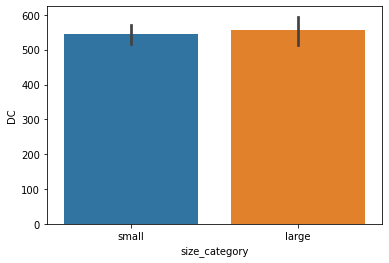

In [90]:
sns.barplot(data=df1, x='size_category', y='DC')

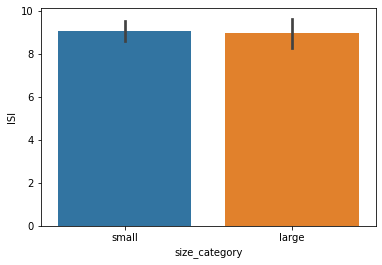

In [91]:
sns.barplot(data=df1, x='size_category', y='ISI')

In [70]:
# Splitting data into input and target variables:
x= final_df.drop(labels=['size_category'], axis=1)
print(x)
y= final_df['size_category']
print(y)

            0         1         2  ...  monthnov  monthoct  monthsep
0    0.870968  0.086492  0.101325  ...         0         0         0
1    0.927742  0.118194  0.775419  ...         0         1         0
2    0.927742  0.146795  0.796294  ...         0         1         0
3    0.941935  0.110958  0.081623  ...         0         0         0
4    0.910968  0.172984  0.110590  ...         0         0         0
..        ...       ...       ...  ...       ...       ...       ...
512  0.811613  0.191592  0.771315  ...         0         0         0
513  0.811613  0.191592  0.771315  ...         0         0         0
514  0.811613  0.191592  0.771315  ...         0         0         0
515  0.976774  0.499311  0.711622  ...         0         0         0
516  0.784516  0.006547  0.115867  ...         1         0         0

[517 rows x 28 columns]
0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: uint8


In [98]:
# Tuning Hyperparameters: Batch Size and epochs

# Create sequential model:
def base_model():
  model= Sequential()
  model.add(Dense(12, input_dim=28, kernel_initializer='uniform', activation='relu'))
  model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
  model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
  # output layer
  model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
  # optimizer 
  adam= Adam()
  # Compile model
  model.compile(loss= "binary_crossentropy", optimizer= adam, metrics= ['accuracy'])
  return model

# Define clasification model
classifier= KerasClassifier(build_fn=base_model, verbose= 0)
# Define GridSearch Model
batch_size= [10, 20, 40, 100]
epochs= [10, 20, 50, 100]
# make a Dictionary to store grid parameters
grid_param= dict(batch_size=batch_size, epochs=epochs )
# Build & Fit the gridsearchCV
grid= GridSearchCV(estimator=classifier, param_grid=grid_param, cv= KFold(), verbose=10 )
grid_results= grid.fit(x,y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ batch_size=10, epochs=10, score=1.000, total=   1.6s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.750, total=   1.2s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.524, total=   1.5s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.3s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.680, total=   1.2s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.5s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.699, total=   1.2s
[CV] batch_size=10, epochs=20 ........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.7s remaining:    0.0s


[CV] ............ batch_size=10, epochs=20, score=0.990, total=   1.6s
[CV] batch_size=10, epochs=20 ........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    8.2s remaining:    0.0s


[CV] ............ batch_size=10, epochs=20, score=0.750, total=   1.5s
[CV] batch_size=10, epochs=20 ........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    9.7s remaining:    0.0s


[CV] ............ batch_size=10, epochs=20, score=0.524, total=   1.5s
[CV] batch_size=10, epochs=20 ........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   11.2s remaining:    0.0s


[CV] ............ batch_size=10, epochs=20, score=0.680, total=   1.5s
[CV] batch_size=10, epochs=20 ........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   12.7s remaining:    0.0s


[CV] ............ batch_size=10, epochs=20, score=0.699, total=   1.5s
[CV] batch_size=10, epochs=50 ........................................
[CV] ............ batch_size=10, epochs=50, score=0.875, total=   2.5s
[CV] batch_size=10, epochs=50 ........................................
[CV] ............ batch_size=10, epochs=50, score=0.750, total=   2.5s
[CV] batch_size=10, epochs=50 ........................................
[CV] ............ batch_size=10, epochs=50, score=0.524, total=   2.6s
[CV] batch_size=10, epochs=50 ........................................
[CV] ............ batch_size=10, epochs=50, score=0.689, total=   2.5s
[CV] batch_size=10, epochs=50 ........................................
[CV] ............ batch_size=10, epochs=50, score=0.718, total=   2.6s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.990, total=   4.9s
[CV] batch_size=10, epochs=100 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.2min finished


In [99]:
# summerize results
print('Best:{}, using {}'.format(grid_results.best_score_, grid_results.best_params_))
means= grid_results.cv_results_['mean_test_score']
stds= grid_results.cv_results_['std_test_score']
params= grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best:0.773226284980774, using {'batch_size': 10, 'epochs': 100}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 10, 'epochs': 10}
0.728659451007843,0.1510055827692834 with: {'batch_size': 10, 'epochs': 20}
0.7114077687263489,0.11296816357725956 with: {'batch_size': 10, 'epochs': 50}
0.773226284980774,0.12513596037961197 with: {'batch_size': 10, 'epochs': 100}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 20, 'epochs': 10}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 20, 'epochs': 20}
0.7190440654754638,0.13468233523501624 with: {'batch_size': 20, 'epochs': 50}
0.7519417524337768,0.12703296332602873 with: {'batch_size': 20, 'epochs': 100}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 40, 'epochs': 10}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 40, 'epochs': 20}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 40, 'epochs': 50}
0.7171209812164306,0.13136860663109784 with: {'batch_size': 40, 'epochs': 100}


In [109]:
# Tuning hyperparameter: Learning rate and dropout rate
# Create sequential model:
def base_model_lr_drate(learning_rate,dropout_rate):
  model= Sequential()
  model.add(Dense(12, input_dim=28, kernel_initializer='uniform', activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
  model.add(Dropout(dropout_rate))
  # output layer
  model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
  # optimizer 
  adam= Adam(learning_rate=learning_rate)
  # Compile model
  model.compile(loss= "binary_crossentropy", optimizer= adam, metrics= ['accuracy'])
  return model

# Define clasification model
classifier= KerasClassifier(build_fn=base_model_lr_drate, verbose= 0, batch_size=10, epochs=100)
# Define GridSearch Model
learning_rate= [0.001, 0.01, 0.10, 0.2, 0.5]
dropout_rate= [0, 0.1, 0.2, 0.5]
# make a Dictionary to store grid parameters
grid_param= dict(learning_rate=learning_rate, dropout_rate=dropout_rate )
# Build & Fit the gridsearchCV
grid= GridSearchCV(estimator=classifier, param_grid=grid_param, cv= KFold(), verbose=10, return_train_score=True )
grid_results= grid.fit(x,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] dropout_rate=0, learning_rate=0.001 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  dropout_rate=0, learning_rate=0.001, score=(train=0.923, test=0.971), total=   4.9s
[CV] dropout_rate=0, learning_rate=0.001 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s


[CV]  dropout_rate=0, learning_rate=0.001, score=(train=0.920, test=0.788), total=   4.7s
[CV] dropout_rate=0, learning_rate=0.001 .............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.9s remaining:    0.0s


[CV]  dropout_rate=0, learning_rate=0.001, score=(train=0.824, test=0.592), total=   4.9s
[CV] dropout_rate=0, learning_rate=0.001 .............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.9s remaining:    0.0s


[CV]  dropout_rate=0, learning_rate=0.001, score=(train=0.915, test=0.835), total=   4.7s
[CV] dropout_rate=0, learning_rate=0.001 .............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   19.7s remaining:    0.0s


[CV]  dropout_rate=0, learning_rate=0.001, score=(train=0.821, test=0.699), total=   4.7s
[CV] dropout_rate=0, learning_rate=0.01 ..............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   24.4s remaining:    0.0s


[CV]  dropout_rate=0, learning_rate=0.01, score=(train=0.976, test=0.933), total=   4.6s
[CV] dropout_rate=0, learning_rate=0.01 ..............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   29.2s remaining:    0.0s


[CV]  dropout_rate=0, learning_rate=0.01, score=(train=0.726, test=0.750), total=   4.7s
[CV] dropout_rate=0, learning_rate=0.01 ..............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   34.0s remaining:    0.0s


[CV]  dropout_rate=0, learning_rate=0.01, score=(train=0.969, test=0.845), total=   4.6s
[CV] dropout_rate=0, learning_rate=0.01 ..............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   38.8s remaining:    0.0s


[CV]  dropout_rate=0, learning_rate=0.01, score=(train=0.744, test=0.680), total=   4.7s
[CV] dropout_rate=0, learning_rate=0.01 ..............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   43.5s remaining:    0.0s


[CV]  dropout_rate=0, learning_rate=0.01, score=(train=0.973, test=0.874), total=   5.1s
[CV] dropout_rate=0, learning_rate=0.1 ...............................
[CV]  dropout_rate=0, learning_rate=0.1, score=(train=0.663, test=1.000), total=   4.6s
[CV] dropout_rate=0, learning_rate=0.1 ...............................
[CV]  dropout_rate=0, learning_rate=0.1, score=(train=0.726, test=0.750), total=   4.6s
[CV] dropout_rate=0, learning_rate=0.1 ...............................
[CV]  dropout_rate=0, learning_rate=0.1, score=(train=0.783, test=0.524), total=   4.6s
[CV] dropout_rate=0, learning_rate=0.1 ...............................
[CV]  dropout_rate=0, learning_rate=0.1, score=(train=0.744, test=0.680), total=   4.7s
[CV] dropout_rate=0, learning_rate=0.1 ...............................
[CV]  dropout_rate=0, learning_rate=0.1, score=(train=0.739, test=0.699), total=   4.6s
[CV] dropout_rate=0, learning_rate=0.2 ...............................
[CV]  dropout_rate=0, learning_rate=0.2, scor

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  8.0min finished


In [110]:
# summerize results
print('Best:{}, using {}'.format(grid_results.best_score_, grid_results.best_params_))
means= grid_results.cv_results_['mean_test_score']
stds= grid_results.cv_results_['std_test_score']
params= grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best:0.850989556312561, using {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7771658062934875,0.12759593930243615 with: {'dropout_rate': 0, 'learning_rate': 0.001}
0.8161501049995422,0.09026122339511955 with: {'dropout_rate': 0, 'learning_rate': 0.01}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0, 'learning_rate': 0.1}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0, 'learning_rate': 0.2}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0, 'learning_rate': 0.5}
0.765533983707428,0.15220793195253832 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.850989556312561,0.046164789670089655 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.1, 'learning_rate': 0.2}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.1, 'learning_rate': 0.5}
0.7655153155326844,0.14758433469753773 w

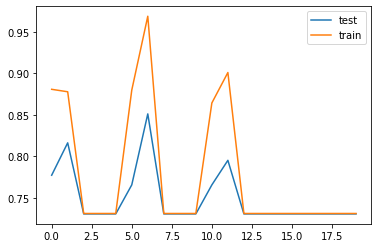

In [112]:
# plotting train test plot
test_scores= grid_results.cv_results_['mean_test_score']
train_scores=grid_results.cv_results_['mean_train_score']

plt.plot(test_scores, label='test')
plt.plot(train_scores, label= 'train')
plt.legend(loc='best')
plt.show()

In [113]:
# Tuning hyperparameter: Activation function and Kernal initializer
# Create sequential model:
def base_model_af_init(init,activation_function):
  model= Sequential()
  model.add(Dense(12, input_dim=28, kernel_initializer=init, activation=activation_function))
  model.add(Dropout(0.1))
  model.add(Dense(8, kernel_initializer=init, activation=activation_function))
  model.add(Dropout(0.1))
  model.add(Dense(8, kernel_initializer=init, activation=activation_function))
  model.add(Dropout(0.1))
  # output layer
  model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
  # optimizer 
  adam= Adam(learning_rate=0.01)
  # Compile model
  model.compile(loss= "binary_crossentropy", optimizer= adam, metrics= ['accuracy'])
  return model

# Define clasification model
classifier= KerasClassifier(build_fn=base_model_af_init, verbose= 0, batch_size=10, epochs=100)
# Define GridSearch Model
init= ['uniform', 'normal', 'zero']
activation_function= ['relu', 'sigmoid', 'tanh', 'linear', 'softmax']
# make a Dictionary to store grid parameters
grid_param= dict(init=init, activation_function=activation_function )
# Build & Fit the gridsearchCV
grid= GridSearchCV(estimator=classifier, param_grid=grid_param, cv= KFold(), verbose=10, return_train_score=True )
grid_results= grid.fit(x,y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] activation_function=relu, init=uniform ..........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation_function=relu, init=uniform, score=(train=0.964, test=0.933), total=   4.7s
[CV] activation_function=relu, init=uniform ..........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s


[CV]  activation_function=relu, init=uniform, score=(train=0.973, test=0.875), total=   4.6s
[CV] activation_function=relu, init=uniform ..........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.5s remaining:    0.0s


[CV]  activation_function=relu, init=uniform, score=(train=0.969, test=0.845), total=   4.7s
[CV] activation_function=relu, init=uniform ..........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.3s remaining:    0.0s


[CV]  activation_function=relu, init=uniform, score=(train=0.896, test=0.845), total=   4.6s
[CV] activation_function=relu, init=uniform ..........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   19.0s remaining:    0.0s


[CV]  activation_function=relu, init=uniform, score=(train=0.976, test=0.883), total=   5.2s
[CV] activation_function=relu, init=normal ...........................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   24.3s remaining:    0.0s


[CV]  activation_function=relu, init=normal, score=(train=0.889, test=0.981), total=   4.8s
[CV] activation_function=relu, init=normal ...........................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   29.2s remaining:    0.0s


[CV]  activation_function=relu, init=normal, score=(train=0.947, test=0.827), total=   4.7s
[CV] activation_function=relu, init=normal ...........................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   34.0s remaining:    0.0s


[CV]  activation_function=relu, init=normal, score=(train=0.964, test=0.786), total=   4.6s
[CV] activation_function=relu, init=normal ...........................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   38.8s remaining:    0.0s


[CV]  activation_function=relu, init=normal, score=(train=0.983, test=0.864), total=   4.7s
[CV] activation_function=relu, init=normal ...........................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   43.6s remaining:    0.0s


[CV]  activation_function=relu, init=normal, score=(train=0.976, test=0.883), total=   4.6s
[CV] activation_function=relu, init=zero .............................
[CV]  activation_function=relu, init=zero, score=(train=0.663, test=1.000), total=   4.8s
[CV] activation_function=relu, init=zero .............................
[CV]  activation_function=relu, init=zero, score=(train=0.726, test=0.750), total=   4.7s
[CV] activation_function=relu, init=zero .............................
[CV]  activation_function=relu, init=zero, score=(train=0.783, test=0.524), total=   4.6s
[CV] activation_function=relu, init=zero .............................
[CV]  activation_function=relu, init=zero, score=(train=0.744, test=0.680), total=   4.7s
[CV] activation_function=relu, init=zero .............................
[CV]  activation_function=relu, init=zero, score=(train=0.739, test=0.699), total=   4.6s
[CV] activation_function=sigmoid, init=uniform .......................
[CV]  activation_function=sigmoi

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  6.0min finished


In [114]:
# summerize results
print('Best:{}, using {}'.format(grid_results.best_score_, grid_results.best_params_))
means= grid_results.cv_results_['mean_test_score']
stds= grid_results.cv_results_['std_test_score']
params= grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best:0.9457991123199463, using {'activation_function': 'linear', 'init': 'normal'}
0.8761015772819519,0.03235893907235507 with: {'activation_function': 'relu', 'init': 'uniform'}
0.8683345794677735,0.06529383899247249 with: {'activation_function': 'relu', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'zero'}
0.8373973131179809,0.08754601743996698 with: {'activation_function': 'sigmoid', 'init': 'uniform'}
0.8393017292022705,0.09592768695910907 with: {'activation_function': 'sigmoid', 'init': 'normal'}
0.8450896382331848,0.07812790624660071 with: {'activation_function': 'sigmoid', 'init': 'zero'}
0.9322628855705262,0.0391438809321466 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9264189720153808,0.04175653309247339 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'tanh', 'init': 'zero'}
0.930339801311493,0.04540587685809535 with: {'activation_

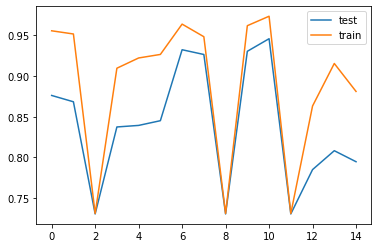

In [115]:
# plotting train test plot
test_scores= grid_results.cv_results_['mean_test_score']
train_scores=grid_results.cv_results_['mean_train_score']

plt.plot(test_scores, label='test')
plt.plot(train_scores, label= 'train')
plt.legend(loc='best')
plt.show()

In [116]:
# Tuning hyperparameter: Number of neurons in activatino layer
# Create sequential model:
def base_model_num_neuron(neuron1,neuron2, neuron3):
  model= Sequential()
  model.add(Dense(neuron1, input_dim=28, kernel_initializer='normal', activation='linear'))
  model.add(Dropout(0.1))
  model.add(Dense(neuron2, kernel_initializer='normal', activation='linear'))
  model.add(Dropout(0.1))
  model.add(Dense(neuron3, kernel_initializer='normal', activation='linear'))
  model.add(Dropout(0.1))
  # output layer
  model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
  # optimizer 
  adam= Adam(learning_rate=0.01)
  # Compile model
  model.compile(loss= "binary_crossentropy", optimizer= adam, metrics= ['accuracy'])
  return model

# Define clasification model
classifier= KerasClassifier(build_fn=base_model_num_neuron, verbose= 0, batch_size=10, epochs=100)
# Define GridSearch Model
neuron1= [2,8,16,25,30]
neuron2= [2,8,16,25,30]
neuron3= [2,8,16,25,30]
# make a Dictionary to store grid parameters
grid_param= dict(neuron1=neuron1, neuron2=neuron2, neuron3=neuron3)
# Build & Fit the gridsearchCV
grid= GridSearchCV(estimator=classifier, param_grid=grid_param, cv= KFold(), verbose=10, return_train_score=True )
grid_results= grid.fit(x,y)

Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV] neuron1=2, neuron2=2, neuron3=2 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  neuron1=2, neuron2=2, neuron3=2, score=(train=0.981, test=1.000), total=   4.6s
[CV] neuron1=2, neuron2=2, neuron3=2 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


[CV]  neuron1=2, neuron2=2, neuron3=2, score=(train=0.971, test=0.933), total=   4.6s
[CV] neuron1=2, neuron2=2, neuron3=2 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.4s remaining:    0.0s


[CV]  neuron1=2, neuron2=2, neuron3=2, score=(train=0.959, test=0.971), total=   4.5s
[CV] neuron1=2, neuron2=2, neuron3=2 .................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.0s remaining:    0.0s


[CV]  neuron1=2, neuron2=2, neuron3=2, score=(train=0.959, test=0.893), total=   4.5s
[CV] neuron1=2, neuron2=2, neuron3=2 .................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   18.6s remaining:    0.0s


[CV]  neuron1=2, neuron2=2, neuron3=2, score=(train=0.981, test=0.961), total=   4.4s
[CV] neuron1=2, neuron2=2, neuron3=8 .................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   23.2s remaining:    0.0s


[CV]  neuron1=2, neuron2=2, neuron3=8, score=(train=0.954, test=1.000), total=   4.6s
[CV] neuron1=2, neuron2=2, neuron3=8 .................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   27.9s remaining:    0.0s


[CV]  neuron1=2, neuron2=2, neuron3=8, score=(train=0.969, test=0.904), total=   4.6s
[CV] neuron1=2, neuron2=2, neuron3=8 .................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   32.5s remaining:    0.0s


[CV]  neuron1=2, neuron2=2, neuron3=8, score=(train=0.969, test=0.971), total=   4.6s
[CV] neuron1=2, neuron2=2, neuron3=8 .................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   37.2s remaining:    0.0s


[CV]  neuron1=2, neuron2=2, neuron3=8, score=(train=0.988, test=0.942), total=   4.5s
[CV] neuron1=2, neuron2=2, neuron3=8 .................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   41.8s remaining:    0.0s


[CV]  neuron1=2, neuron2=2, neuron3=8, score=(train=0.976, test=0.932), total=   4.5s
[CV] neuron1=2, neuron2=2, neuron3=16 ................................
[CV]  neuron1=2, neuron2=2, neuron3=16, score=(train=0.971, test=1.000), total=   4.6s
[CV] neuron1=2, neuron2=2, neuron3=16 ................................
[CV]  neuron1=2, neuron2=2, neuron3=16, score=(train=0.964, test=0.904), total=   5.1s
[CV] neuron1=2, neuron2=2, neuron3=16 ................................
[CV]  neuron1=2, neuron2=2, neuron3=16, score=(train=0.971, test=0.961), total=   4.5s
[CV] neuron1=2, neuron2=2, neuron3=16 ................................
[CV]  neuron1=2, neuron2=2, neuron3=16, score=(train=0.990, test=0.942), total=   4.6s
[CV] neuron1=2, neuron2=2, neuron3=16 ................................
[CV]  neuron1=2, neuron2=2, neuron3=16, score=(train=0.976, test=0.922), total=   4.5s
[CV] neuron1=2, neuron2=2, neuron3=25 ................................
[CV]  neuron1=2, neuron2=2, neuron3=25, score=(train=

[Parallel(n_jobs=1)]: Done 625 out of 625 | elapsed: 54.2min finished


In [117]:
# summerize results
print('Best:{}, using {}'.format(grid_results.best_score_, grid_results.best_params_))
means= grid_results.cv_results_['mean_test_score']
stds= grid_results.cv_results_['std_test_score']
params= grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best:0.9689880609512329, using {'neuron1': 16, 'neuron2': 16, 'neuron3': 8}
0.9515869975090027,0.036257797457946946 with: {'neuron1': 2, 'neuron2': 2, 'neuron3': 2}
0.9497012615203857,0.033033778691128474 with: {'neuron1': 2, 'neuron2': 2, 'neuron3': 8}
0.945817768573761,0.03316959224470333 with: {'neuron1': 2, 'neuron2': 2, 'neuron3': 16}
0.9535100817680359,0.024043273118757157 with: {'neuron1': 2, 'neuron2': 2, 'neuron3': 25}
0.9303771376609802,0.053629981954428474 with: {'neuron1': 2, 'neuron2': 2, 'neuron3': 30}
0.9554331541061402,0.029179037345624003 with: {'neuron1': 2, 'neuron2': 8, 'neuron3': 2}
0.9419342875480652,0.03118384491114921 with: {'neuron1': 2, 'neuron2': 8, 'neuron3': 8}
0.9419902920722961,0.04170522010610567 with: {'neuron1': 2, 'neuron2': 8, 'neuron3': 16}
0.9612584114074707,0.022099139387091585 with: {'neuron1': 2, 'neuron2': 8, 'neuron3': 25}
0.9573188900947571,0.036142760617861786 with: {'neuron1': 2, 'neuron2': 8, 'neuron3': 30}
0.9536221027374268,0.03911287746

In [137]:
# modeling with optimum hyperparameters:
# Create sequential model:
def base_model_optimized():
  model= Sequential()
  model.add(Dense(16, input_dim=28, kernel_initializer='normal', activation='linear'))
  model.add(Dropout(0.1))
  model.add(Dense(16, kernel_initializer='normal', activation='linear'))
  model.add(Dropout(0.1))
  model.add(Dense(8, kernel_initializer='normal', activation='linear'))
  model.add(Dropout(0.1))
  # output layer
  model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
  # optimizer 
  adam= Adam(learning_rate=0.01)
  # Compile model
  model.compile(loss= "binary_crossentropy", optimizer= adam, metrics= ['accuracy'])
  return model

# Define clasification model
classifier= KerasClassifier(build_fn=base_model_optimized, verbose= 0, batch_size=10, epochs=100)
 
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25, random_state=0)

history= classifier.fit(x_train,y_train, validation_split=0.25)

# predicting for validation set
y_predict= classifier.predict(x_test)

#printing the metrics
print(accuracy_score(y_test, y_predict))



0.9615384615384616


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [145]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix, precision_score, f1_score,recall_score
print('confusion matrix \n',confusion_matrix(y_test, y_predict))
print('precision_score:',precision_score(y_test, y_predict))
print('recall_score:   ',recall_score(y_test, y_predict))
print('f1_score:       ',f1_score(y_test, y_predict))

confusion matrix 
 [[33  4]
 [ 1 92]]
precision_score: 0.9583333333333334
recall_score:    0.989247311827957
f1_score:        0.9735449735449735


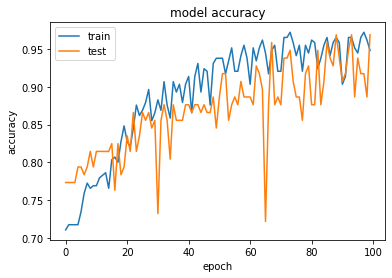

In [130]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

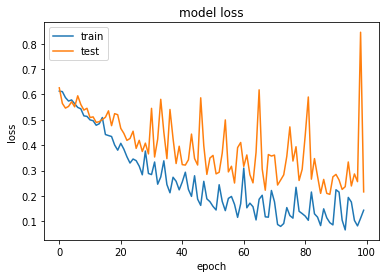

In [131]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()